# EOAD 20242025 - Block II

Mestrado em Ciência dos Dados para Ciências Sociais <br>
Estatística e Optimização para Apoio à Decisão



## Practice Notebook Content Summary

#### Part VII :: Hypothesis testing
- **Objectives:**
  - Understand the steps of hypothesis testing, including formulating null and alternative hypotheses.
  - Learn how to interpret test results and draw conclusions.
- **Methods:**
  - Demonstration of p-values, significance levels, and types of errors in testing (Type I and II errors).
  - Example of hypothesis testing using real data with step-by-step calculations.
- **Findings:**
  - Application of hypothesis testing to real-world scenarios to understand decision-making based on statistical evidence.

#### Part VIII :: Inferential Statistics (Univariate Analysis)
- **Objectives:**
  - Compare a value against a known statement or evaluate differences between two groups.
  - Learn when to use parametric vs. non-parametric tests.
- **Methods:**
  - Overview of t-tests, z-tests (parametric) and Mann-Whitney, Wilcoxon (non-parametric) tests.
  - Explanation of assumptions for each approach and how to check them.
- **Findings:**
  - Understand the use cases for different tests and how to interpret results.
  - Comparison of results using parametric and non-parametric tests to understand the impact of test choice on interpretation.

#### Part IX::  Inferential Statistics (Multivariate Analysis)
- **Objectives:**
  - Explore statistical methods for comparing more than two groups or evaluating relationships between multiple variables.
  - Understand when to apply ANOVA, Chi-square, and similar tests.
- **Methods:**
  - Introduction to one-way and two-way ANOVA for continuous variables.
  - Explanation of Chi-square tests for categorical data comparisons.
- **Findings:**
  - Practical examples demonstrating how simple different statistical methods reveal differences or relationships between groups.

#### Part X :: Correlation and Regression
- **Objectives:**
  - Gain an introductory understanding of correlation and its relationship to regression analysis.
  - Learn the basics of simple linear regression.
- **Methods:**
  - Overview of correlation coefficients (Pearson and Spearman).
  - Introduction to linear regression models and interpreting regression coefficients.
- **Findings:**
  - Real-life data examples showing how correlation and regression are used to model relationships between variables.


## Setup

### Imports

Packages to do statistical inference
  
  There are great tools in the Python ecosystem for doing statistical inference, including by optimization
 - [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
 - [statsmodels](https://www.statsmodels.org/stable/index.html)

In [2]:
from pathlib import Path

import pandas as pd

import numpy as np

import csv

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
sns.set_theme()


from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import scipy.stats as stats
from scipy.stats import binom

from scipy.stats import t, ttest_1samp

import scikit_posthocs as sp




from pprint import pprint as pp

from sklearn.datasets import load_iris



In [3]:
Path.cwd()

WindowsPath('c:/Users/paulo/OneDrive/ONEDRIVE_CLOUD_DISK/TRABALHO_AULAS/AL20242025/1SEM/EOAD/EOAD Block 2/TP_moodle/EOAD_Block2_PracticeRepository/notebooks')

In [4]:
%cd ../

c:\Users\paulo\OneDrive\ONEDRIVE_CLOUD_DISK\TRABALHO_AULAS\AL20242025\1SEM\EOAD\EOAD Block 2\TP_moodle\EOAD_Block2_PracticeRepository


In [5]:
Path.cwd()

WindowsPath('c:/Users/paulo/OneDrive/ONEDRIVE_CLOUD_DISK/TRABALHO_AULAS/AL20242025/1SEM/EOAD/EOAD Block 2/TP_moodle/EOAD_Block2_PracticeRepository')

### Pandas Configuration Options

In [6]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
pd.set_option('display.expand_frame_repr', True)

### Load Data

- The key data files for this notebook can be found on one of the most know [machine learning repositories](https://archive.ics.uci.edu/), in particular, our [students performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance) is adapted from the original data of the UCI Machine Learning Repository.

**Data File Objects**

In [7]:
students_performance_mat_df = pd.read_csv(r'./data/inputs/students_performance/student-mat.csv', sep=';')


In [8]:
students_performance_mat_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<Axes: xlabel='G3', ylabel='Count'>

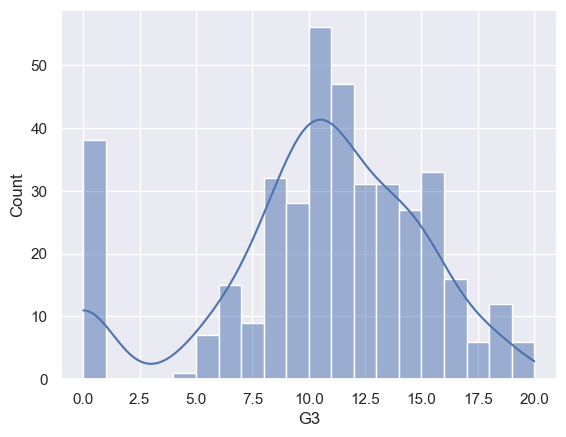

In [9]:
sns.histplot(students_performance_mat_df['G3'], bins=20, kde=True)

In [10]:
students_performance_all_df = pd.read_csv(r'./data/inputs/students_performance/students_performance_all_df.csv')


In [11]:
students_performance_all_df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_mat,G1_mat,G2_mat,G3_mat,student_id,studytime_por,failures_por,schoolsup_por,famsup_por,paid_por,activities_por,absences_por,G1_por,G2_por,G3_por,travel_time_cont,FinalResult_por,FinalResult_mat,FinalResult_overall
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1,2.0,0.0,yes,no,no,no,4.0,0.0,11.0,11.0,21.491229,Pass,Fail,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,2,2.0,0.0,no,yes,no,no,2.0,9.0,11.0,11.0,3.484904,Pass,Fail,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,3,2.0,0.0,yes,no,no,no,6.0,12.0,13.0,12.0,5.711113,Pass,Pass,Pass


In [12]:
students_performance_all_df.shape

(395, 48)

In [13]:
students_performance_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    int64  
 7   Fedu                 395 non-null    int64  
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    int64  
 13  studytime_mat        395 non-null    int64  
 14  failures_mat         395 non-null    int64  
 15  schoolsup_mat        395 non-null    obj

**Iris Data Set**

In [14]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

def iris_typing(x):
    types = {0.0: 'setosa',
             1.0: 'versicolour',
             2.0: 'virginica'}
    return types[x]

iris_df['species'] = iris_df.target.apply(iris_typing)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Michelson speed of light measurements data

From the [Michelson-Morley](https://en.wikipedia.org/wiki/Michelson%E2%80%93Morley_experiment) experiments

In [15]:
michelson_df = pd.read_csv(r'.\data\inputs\michelson\michelson_speed_of_light.csv')

michelson_df.drop(columns=['Unnamed: 0'], inplace=True)
michelson_df.columns = michelson_df.columns.str.strip()
michelson_df.head(2)

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


## Recall some data exploration...

In [16]:
students_performance_all_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime_mat',
       'failures_mat', 'schoolsup_mat', 'famsup_mat', 'paid_mat',
       'activities_mat', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'student_id', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por', 'travel_time_cont',
       'FinalResult_por', 'FinalResult_mat', 'FinalResult_overall'],
      dtype='object')

In [17]:
students_performance_all_df['G3_por'].mean()

np.float64(12.554054054054054)

In [18]:
students_performance_all_df['G3_mat'].mean()

np.float64(10.415189873417722)

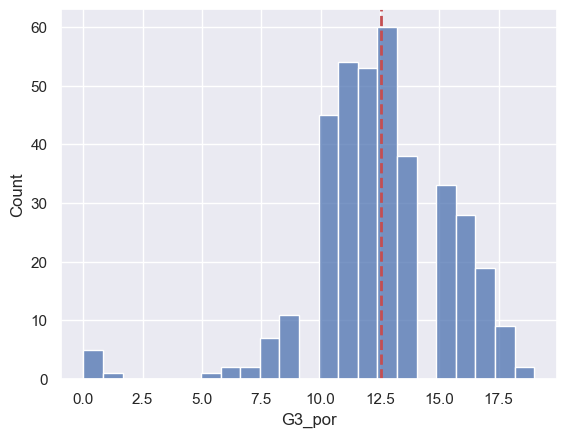

In [19]:
#histogram with additional information
sns.histplot(data = students_performance_all_df, x = students_performance_all_df['G3_por'].dropna())
plt.axvline(students_performance_all_df['G3_por'].mean(), color='r', linestyle='dashed', linewidth=2)

#### *Distribution of students by gender* 

In [20]:
students_performance_all_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime_mat',
       'failures_mat', 'schoolsup_mat', 'famsup_mat', 'paid_mat',
       'activities_mat', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'student_id', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por', 'travel_time_cont',
       'FinalResult_por', 'FinalResult_mat', 'FinalResult_overall'],
      dtype='object')

[Text(0, 0, '166'), Text(0, 0, '21')]

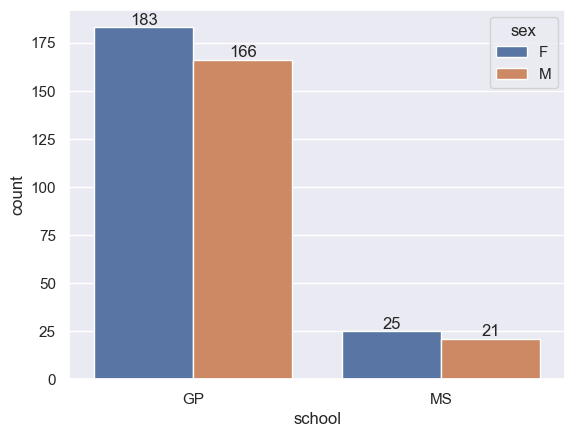

In [21]:
#bar chart
ax = sns.countplot(x=students_performance_all_df['school'], data=students_performance_all_df, hue='sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [22]:
#number of cases for the categorical variables 
students_performance_all_df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [23]:
students_performance_all_df.groupby(['school', 'sex']).size()

school  sex
GP      F      183
        M      166
MS      F       25
        M       21
dtype: int64

In [24]:
students_performance_all_df.groupby(['school', 'sex']).size().unstack()

sex,F,M
school,,
GP,183,166
MS,25,21


### **Visual representation of the categorical and numerical variables**

#### *Distribution of marks of first test in the three cycles* 

<function matplotlib.pyplot.show(close=None, block=None)>

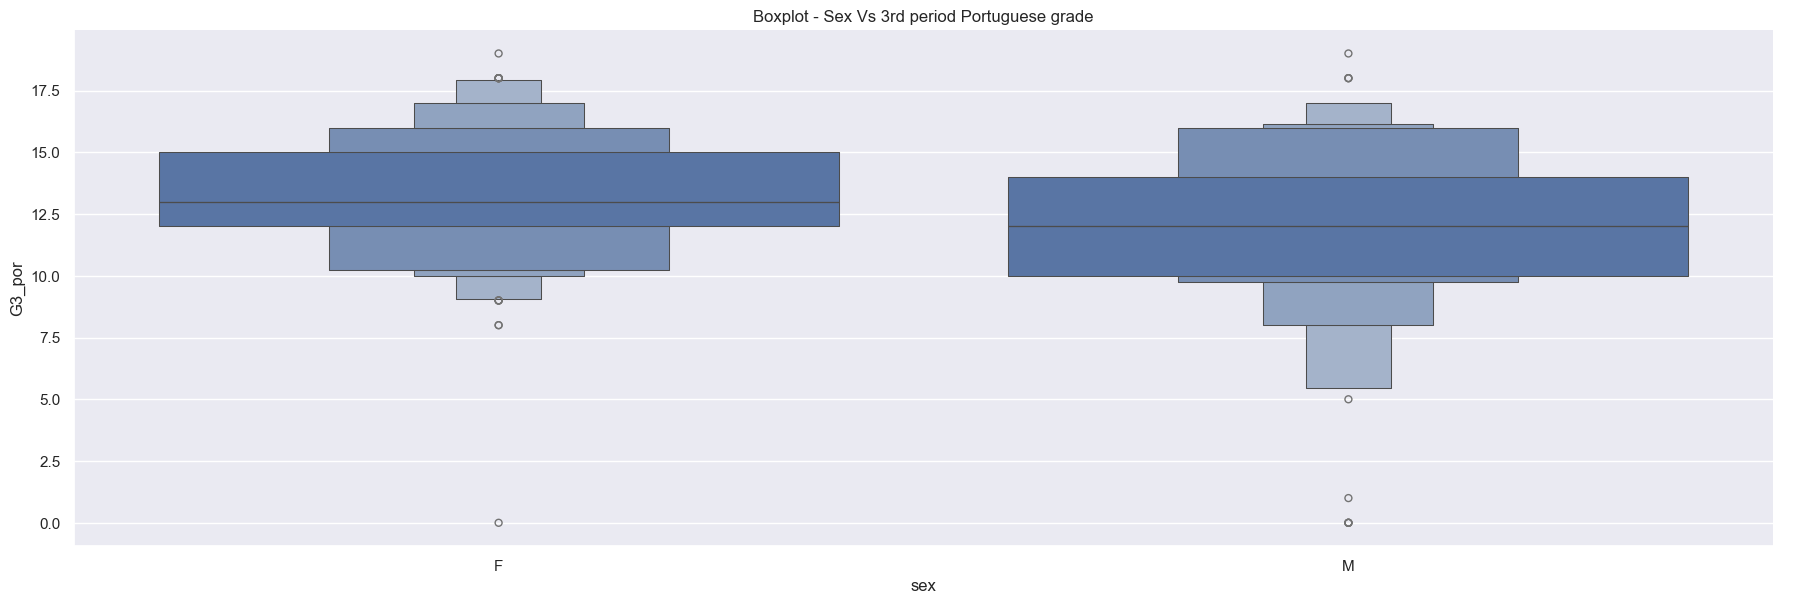

In [25]:
#multiple boxplots
sns.catplot(y='G3_por', x='sex', data=students_performance_all_df, kind="boxen", height=6, aspect=3)
plt.title("Boxplot - Sex Vs 3rd period Portuguese grade")
plt.show

#### *Distribution of portuguese grades by sex* 

<function matplotlib.pyplot.show(close=None, block=None)>

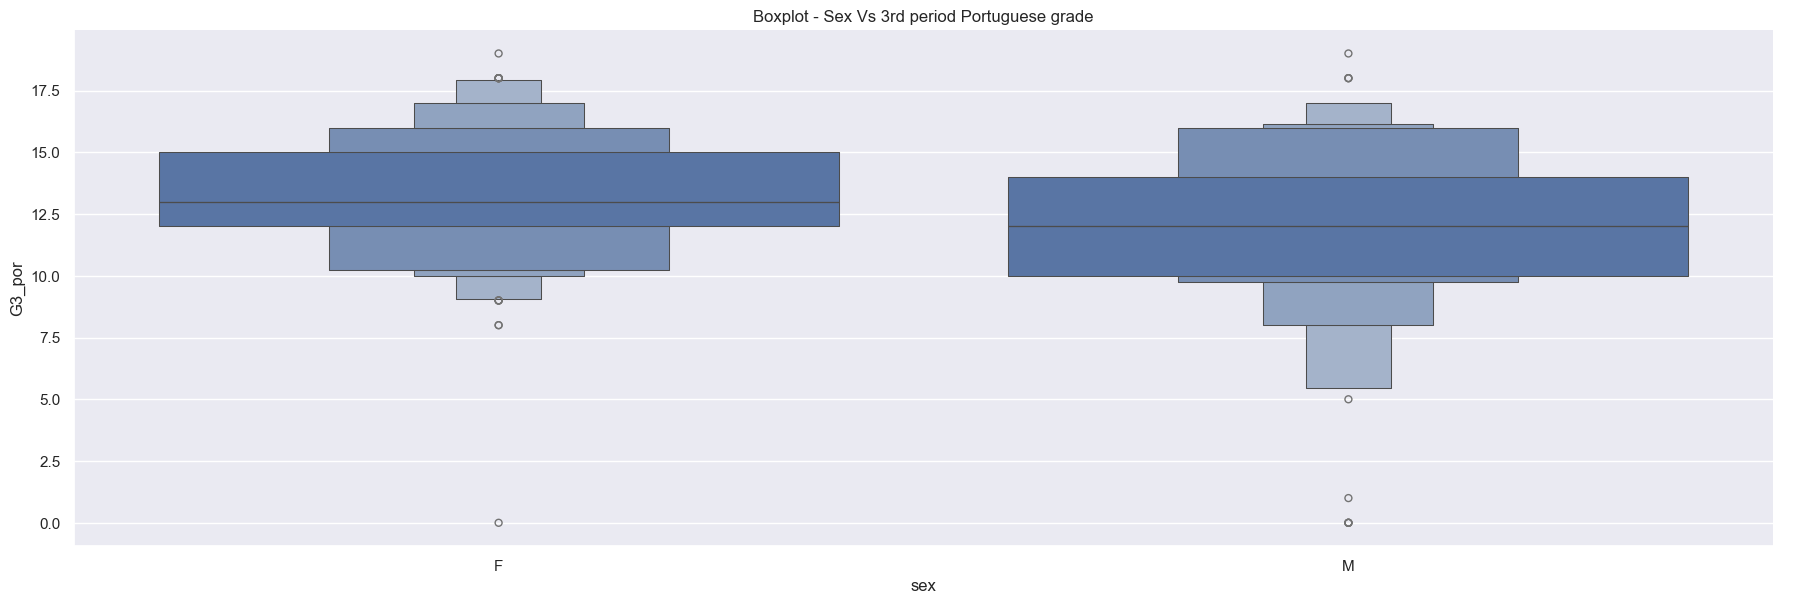

In [26]:
#multiple boxplots
sns.catplot(y='G3_por',x='sex',data=students_performance_all_df, kind="boxen",height=6, aspect=3)
plt.title("Boxplot - Sex Vs 3rd period Portuguese grade")
plt.show

## PART 7 :: Hypothesis Testing

**Imagine you are a educator who defines as an objective that the students in the 3rd period should have a mean grade of 11 in the mathematics subject. You want to test if the students in the 3rd period have a mean grade statistical different from 11 or not.**

### Steps of Hypothesis Testing

#### **Step 1: Define the null and the alternate hypotheses**



**The null hypothesis stats that the mean of the math score for the students records in the 3rd period, denoted as $\mu$, is equal to 11 (you "base" guess, as you do everithing with this "objective" in mind...)**

**The alternative hypothesis suggests that the mean of the math score of the students who take part on this study,  in the 3rd period, $\mu$, is not equal to 11** (indicating a statistically significant difference from 11, our target).


* $H_0$: $\mu$ = 11
* $H_a$: $\mu$ $\neq$ 11

#### **Step 2: Decide the significance level**

Here, we are given that $\alpha$ = 0.05 and 0.001.
(reciprocally, you are stating that you are confident at a 95% and 99% that you can conclude which do not have a difference between your sample mean and your guess about what is the population mean (H0))

#### **Step 3: Identify the test statistic**

The population is normally distributed and the population standard deviation is unknown. So, we can use the t test statistic.

#### **Step 4.1: Calculate the p-value using t-statistic**

*manually*

In [27]:
sample_size_mathtest = len(students_performance_all_df.dropna(subset=['G3_mat']))
sample_size_mathtest

395

In [28]:
sample_mean = students_performance_all_df["G3_mat"].mean()
sample_mean

np.float64(10.415189873417722)

In [29]:
sample_std = students_performance_all_df["G3_mat"].std()
sample_std

np.float64(4.5814426109978434)

In [30]:
sample_size_mathtest

395

In [31]:
sample_mean

np.float64(10.415189873417722)

In [32]:
# Calculating the t-stat
mu = 11

sigma = sample_std

sample_mean = sample_mean

n = sample_size_mathtest


test_stat =  (sample_mean - mu) / (sigma / np.sqrt(n)) 
print("The test statistics is: test_stat = ", test_stat)

The test statistics is: test_stat =  -2.5369457553509798


In [33]:
from scipy.stats import t

# Given t-statistic value
t_statistic = test_stat

# Degrees of freedom (df) for a t-test (typically n - 1)
df = n - 1  # Replace 'n' with your sample size

# Calculate the p-value using the cumulative distribution function (CDF) of the t-distribution

p_value_ttest = (t.cdf(t_statistic, df))*2

print('The p-value is:', p_value_ttest)


The p-value is: 0.011567344595276308


In [34]:
df

394

#### **Step 4.2: Calculate the p-value using t-statistic**

*automatically*

We will use **scipy.stats.ttest_1samp** which calculates the t-test for the mean of one sample given the sample observations. This function returns the t statistic and the p-value for a two-tailed t-test.

In [35]:
# Define the null hypothesis value
null_hypothesis_value = 11

# Perform a one-sample t-test
t_statistic, p_value_ttest = ttest_1samp(students_performance_all_df["G3_mat"], popmean=null_hypothesis_value, nan_policy='omit')

# Print the t-statistic and p-value
print('One sample t-test \nt statistic: {0} p-value: {1} '.format(t_statistic, p_value_ttest))

One sample t-test 
t statistic: -2.53694575535098 p-value: 0.011567344595276299 


#### **Step 5.1: Decide to reject or not to reject the null hypothesis based on t-statistic**

In [36]:
alpha_value1 = 0.001 # Level of significance 

print('Level of significance: %.3f' %alpha_value1)
print('Level of confidence: %.3f ' %((1-alpha_value1)))

if p_value_ttest < alpha_value1: 
    print('We have the evidence to reject the null hypothesis as the p-value is less than the level of significance'.format(p_value_ttest))
else:
    print('We do not have sufficient evidence to reject the null hypothesis as the p-value is greater than the level of significance'.format(p_value_ttest)) 



Level of significance: 0.001
Level of confidence: 0.999 
We do not have sufficient evidence to reject the null hypothesis as the p-value is greater than the level of significance


#### **Step 5.2: Decide to reject or not to reject the null hypothesis based on t-statistic**

In [37]:
alpha_value2 = 0.05 # Level of significance
print('P-Value: %.3f' %p_value_ttest)
print('Level of significance: %.3f' %alpha_value2)

if p_value_ttest < alpha_value2: 
    print('We have the evidence to reject the null hypothesis as the p-value is less than the level of significance'.format(p_value_ttest))
else:
    print('We do not have sufficient evidence to reject the null hypothesis as the p-value is greater than the level of significance'.format(p_value_ttest)) 



P-Value: 0.012
Level of significance: 0.050
We have the evidence to reject the null hypothesis as the p-value is less than the level of significance


**Observation:** 

- At a 5% significance level, we have enough statistical evidence to prove that the mean of the (sample) math grade is not equal to 11

### **Remember confidence interval**

**For the MEAN**
* What is the 95% confidence interval for the average math score of the student population, based on the given sample data? How can we interpret this confidence interval in the context of our analysis?**

In [38]:
# Confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate sample statistics
sample_mean = np.mean(students_performance_all_df["G3_mat"])
sample_std = np.std(students_performance_all_df["G3_mat"], ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(students_performance_all_df.dropna(subset=['G3_mat']))

# Calculate the t-value for the given confidence level and degrees of freedom
t_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calculate standard error
standard_error = sample_std / np.sqrt(sample_size)

# Calculate margin of error
margin_of_error = t_value * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): [{lower_bound:.2f}, {upper_bound:.2f}]")


Sample Mean: 10.42
Confidence Interval (95.0%): [9.96, 10.87]


* What is the 99% confidence interval for the average math score of the student population, based on the given sample data? How can we interpret this confidence interval in the context of our analysis?

In [39]:
# Confidence level (e.g., 99%)
confidence_level = 0.99

# Calculate sample statistics
sample_mean = np.mean(students_performance_all_df["G3_mat"])
sample_std = np.std(students_performance_all_df["G3_mat"], ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(students_performance_all_df.dropna(subset=['G3_mat']))

# Calculate the t-value for the given confidence level and degrees of freedom
t_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calculate standard error
standard_error = sample_std / np.sqrt(sample_size)

# Calculate margin of error
margin_of_error = t_value * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): [{lower_bound:.2f}, {upper_bound:.2f}]")


Sample Mean: 10.42
Confidence Interval (99.0%): [9.82, 11.01]


### Overview of distributions of interest for inference analysis

##### Normal Distribution

In [40]:
#Calculation of the level of confidance (1-alpha) for the standard normal distribution (one-tail)
nd = stats.norm(0, 1) 
nd.cdf(1.96)

np.float64(0.9750021048517795)

In [41]:
#Calculation of the level of significance (alpha) for the standard normal distribution (one-tail)
1-stats.norm.cdf(1.96)

np.float64(0.024997895148220484)

In [42]:
#Calculation of the p-value for the standard normal distribution (one tail)
stats.norm.pdf(1.96)

np.float64(0.058440944333451476)

In [43]:
#Calculation of  the standard normal distribution for the probability (1 – α) = 0.975
stats.norm.ppf(0.975)

np.float64(1.959963984540054)

<Axes: xlabel='G3_mat', ylabel='Count'>

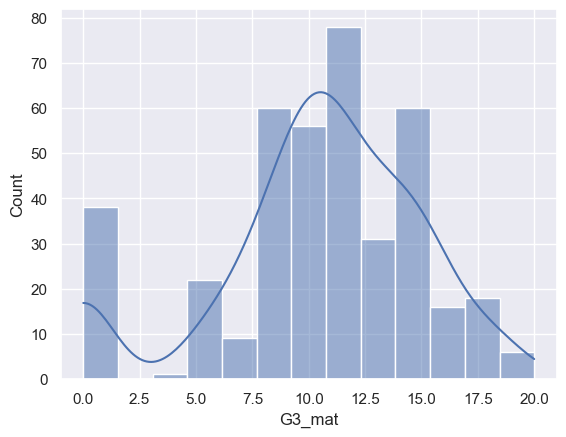

In [44]:
sns.histplot(students_performance_all_df["G3_mat"], kde=True)

In [45]:
#Shapiro-Wilk Test for Normality
from scipy.stats import shapiro

# normality test
stat, p = shapiro(students_performance_all_df["G3_mat"], nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.929, p=0.000
Sample does not look Gaussian (reject H0)


In [46]:
#Kolmogorov-Smirnov test for Normality
from scipy.stats import kstest

# normality test
stat, p = kstest(students_performance_all_df["G3_mat"].dropna(),'norm')
print('Stat=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Stat=0.904, p=0.000
Sample does not look Gaussian (reject H0)


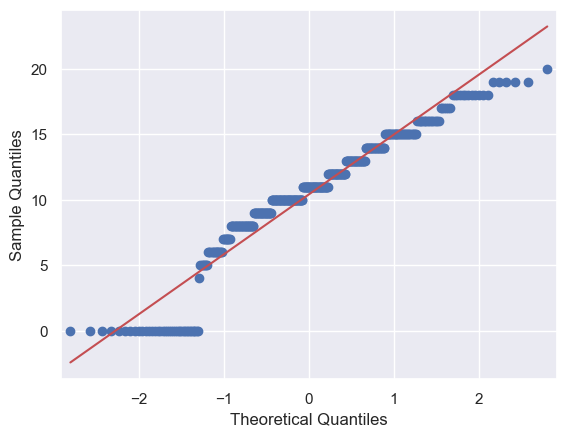

In [47]:
#using the matplotlib library to show a Q-Q plot for analysing the normality
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(students_performance_all_df["G3_mat"], line='s')
pyplot.show()

#### Chi-Square distribution

Used in determining critical values in chi-square test to compare nominal categories

In [48]:
#Cumulative Distribution Function: this is the mass of probability of the function up to a given point; what percentage of the distribution lies on one side of this point
1 - stats.chi2.cdf(3.84, 1)

np.float64(0.05004352124870515)

In [49]:
#Probability Density Function
stats.chi2.pdf(3.84 , 1)

np.float64(0.029846887483060566)

In [50]:
sigma = 0.05
chi2Dist = stats.chi2(len(students_performance_all_df["G3_mat"])-1)
statistic = sum(((students_performance_all_df["G3_mat"]-np.mean(students_performance_all_df["G3_mat"]))/sigma)**2 )
chi2Dist.sf(statistic)

np.float64(0.0)

#### F-Distribution

Used in determining critical values in ANOVA - ANalysis Of VAriance

In [51]:
#percent point function (gives the inverse of the cdf — percentiles)
stats.f.ppf(q=1-0.05, dfn=3, dfd=39)

np.float64(2.8450678052793514)

In [52]:
#cumulative density function
stats.f.cdf(6,dfn=3, dfd=39)

np.float64(0.998167775565957)

## PART 8 :: Inferential statistics (univariate analysis)

### Analysis of one observed value / One sample Test

##### Parametric :: One Sample t-Test (for a Mean Value)

In [53]:
students_performance_all_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime_mat',
       'failures_mat', 'schoolsup_mat', 'famsup_mat', 'paid_mat',
       'activities_mat', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'student_id', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por', 'travel_time_cont',
       'FinalResult_por', 'FinalResult_mat', 'FinalResult_overall'],
      dtype='object')

In [54]:
students_performance_all_df["travel_time_cont"].mean()

np.float64(12.962099268388279)

In [55]:
#To check the mean value of normally distributed data against a reference value 
#we could calculate the corresponding standard error, and use values from the normal distribution to determine how likely it is to find a certain value)

#The two hypotheses for this particular one sample t-test are as follows:
#H0: µ = 15 (the mean students traveltime to school is 15 minutes)
#HA: µ ≠ 15 (the mean students traveltime to school is different from 15 minutes)

t, pVal = stats.ttest_1samp(students_performance_all_df["travel_time_cont"], 15)
print(t, pVal)

-2.997603303701579 0.0028934830623522216


#### NonParametric :: Wilcoxon Signed Rank Sum Test
If the data are not normally distributed, the one-sample t-test should not be used (although this test is fairly robust against deviations from normality)

In [56]:
rank, pVal = stats.wilcoxon(students_performance_all_df["travel_time_cont"]-15)
print(rank, pVal)

24919.0 4.161180500176145e-10


But, despite our sample data do not show a normal distribution, we really need to use a non parametric approach?

Recall the "Central Limit Theorem"!

In [57]:

# Assuming you have a sample of travel times (replace this with your actual data)
np.random.seed(42)  # for reproducibility
simulation_data = students_performance_all_df['travel_time_cont'] # Example data, exponential distribution

# Parameters for simulation
simulate_n_samples = 1000  # Number of bootstrap samples
simulation_size_of_samples = 30    # Size of each sample

# Store sample means
simulation_sample_means = []

# Simulate multiple samples and calculate their means
for _ in range(simulate_n_samples):
    # Draw a random sample with replacement from the original data
    sample = np.random.choice(simulation_data, size=simulation_size_of_samples, replace=True)
    simulation_sample_means.append(np.mean(sample))

# Convert to NumPy array for further operations if needed
simulation_sample_means = np.array(simulation_sample_means)


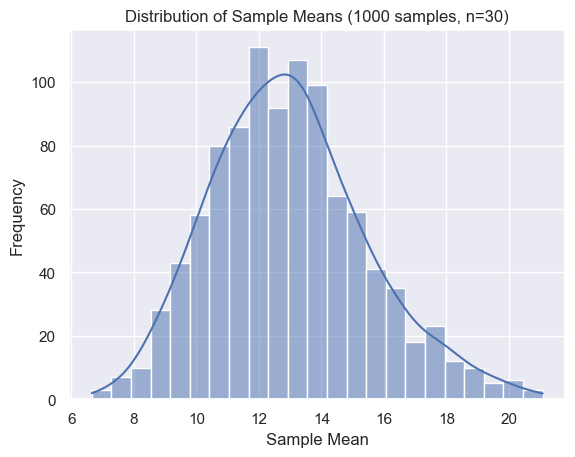

In [58]:

# Plot the distribution of sample means
sns.histplot(simulation_sample_means, kde=True)
plt.title(f'Distribution of Sample Means ({simulate_n_samples} samples, n={simulation_size_of_samples})')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [59]:
simulation_sample_means.mean()

np.float64(12.960794368797503)

In [60]:
students_performance_all_df['travel_time_cont'].mean()

np.float64(12.962099268388279)

In [61]:
students_performance_all_df['travel_time_cont'].size

395

Thus... we can use the one-sample t-test!! (but we will also use the Wilcoxon Signed Rank Sum Test to compare the results). As the CLT states that the distribution of the sample mean will be approximately normally distributed for large sample sizes, regardless of the distribution of the population from which the sample was drawn. Here, we have a sample size of 395, which is large enough to rely on the CTL.

### Comparison of Two Groups

#### Parametric :: Paired t-Test
t-Test between dependent Groups (comparison of means) - Hypothesis testing: comparing two groups Student’s t-test

Example: Analysis of the performance between the first and third test

In [62]:
students_performance_all_df['G3_mat'].mean()

np.float64(10.415189873417722)

In [63]:
students_performance_all_df['G1_mat'].mean()

np.float64(10.90886075949367)

In [64]:
dif=students_performance_all_df['G1_mat']-students_performance_all_df['G3_mat']
dif.mean()

np.float64(0.4936708860759494)

In [65]:
#test the differences between the means of the first (before) and the third (after) tests
from scipy.stats import ttest_rel
ttest_rel(students_performance_all_df['G1_mat'], students_performance_all_df['G3_mat'])

TtestResult(statistic=np.float64(3.5517031247185855), pvalue=np.float64(0.00042906738658041643), df=np.int64(394))

#### Parametric :: Independent t Test
t-Test between Independent Groups (comparison of means) - Hypothesis testing: comparing two groups Student’s t-test

Example: Analysis of the performance in the final math Grade between students in two schools

In [66]:
students_performance_all_df.school.unique()

array(['GP', 'MS'], dtype=object)

In [67]:
#select the marks (score) of the third test of the big classes
school_GP_G3mat = students_performance_all_df.loc[students_performance_all_df['school']=='GP', 'G3_mat']
school_GP_G3mat

0       6
1       6
2      10
3      15
4      10
       ..
344    10
345    14
346    16
347     9
348    15
Name: G3_mat, Length: 349, dtype: int64

In [68]:
school_GP_G3mat.mean()

np.float64(10.489971346704872)

In [69]:
#select the marks of the third test of the small classes
school_MS_G3mat = students_performance_all_df.loc[students_performance_all_df['school']=='MS', 'G3_mat']
school_MS_G3mat

349    13
350     8
351    13
352     8
353     8
354    11
355     9
356    13
357    11
358    10
359    16
360    13
361    12
362    10
363    15
364    12
365    10
366    13
367     0
368    10
369    11
370     9
371    12
372    11
373     5
374    19
375    10
376    15
377    10
378    15
379    10
380    14
381     7
382    10
383     0
384     5
385    10
386     6
387     0
388     8
389     0
390     9
391    16
392     7
393    10
394     9
Name: G3_mat, dtype: int64

In [70]:
school_MS_G3mat.mean()

np.float64(9.847826086956522)

<Axes: xlabel='school', ylabel='G3_mat'>

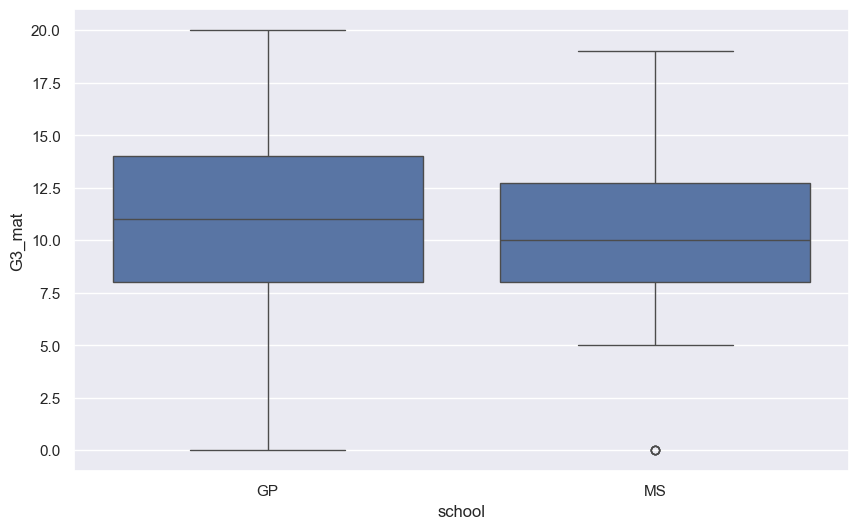

In [71]:
#box plots to compare the means and the distribution of the groups
plt.figure(figsize = (10,6))
sns.boxplot(data=students_performance_all_df, x = "school", y = "G3_mat")

In [72]:
#Levene Test (H0: the variances are equal) 
stats.levene(school_MS_G3mat,school_GP_G3mat)

LeveneResult(statistic=np.float64(0.8377081603117896), pvalue=np.float64(0.3606142973401584))

In [73]:
from scipy.stats import ttest_ind
t_statistic, pVal = stats.ttest_ind(school_MS_G3mat, school_GP_G3mat)
stat, p = ttest_ind(school_MS_G3mat, school_GP_G3mat, equal_var=True)
print('t=%.3f, p=%.3f' % (stat, p))

t=-0.893, p=0.372


#### NonParametric :: Independent samples :: Mann-Witney

In [74]:
#select the marks (score) of the fisrt test of the women
female_G3mat = students_performance_all_df.loc[students_performance_all_df['sex']=="F", 'G3_mat']
female_G3mat.mean()

np.float64(9.966346153846153)

In [75]:
#select the marks (score) of the fisrt test of the women
male_G3mat = students_performance_all_df.loc[students_performance_all_df['sex']=="M", 'G3_mat']
male_G3mat.mean()

np.float64(10.914438502673796)

<Axes: xlabel='sex', ylabel='G3_mat'>

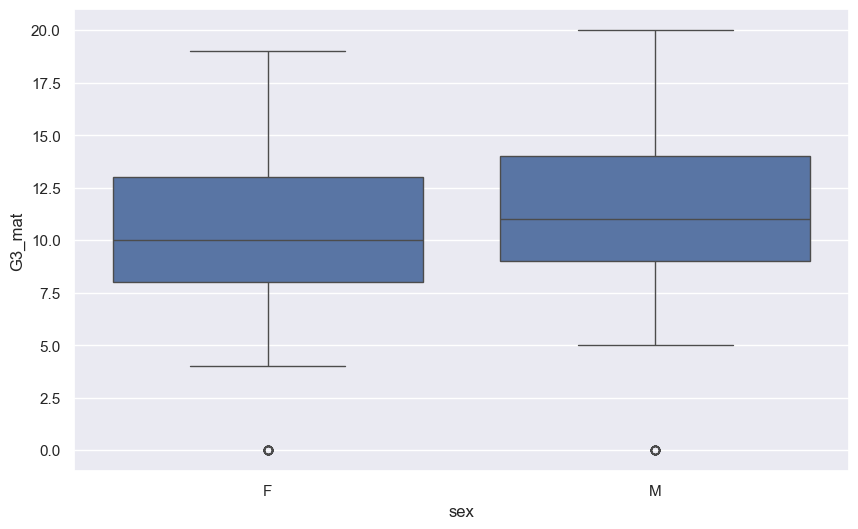

In [76]:
#box plots to compare the means and the distribution of the groups
plt.figure(figsize = (10,6))
sns.boxplot(data=students_performance_all_df, x = "sex", y = "G3_mat")

In [77]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(male_G3mat, female_G3mat)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=21758.000, p=0.041


## PART 9 :: Statistical Inference :: Multivariate 
Comparison of more than Two Groups

### Comparison of a continuous variables by more than two categories (defined by a categorical variable)

#### Parametric :: Analysis of Variance (ANOVA) 
Comparison of Multiple Groups: compares the variance between groups and that within groups, and see if those distributions match the null hypothesis that all groups come from the same distribution 






 The null hypothesis of ANOVA states that all group means are equal. If the p-value from ANOVA is less than your significance level (e.g., 0.05), then at least one group mean is different

 Hypotheses for ANOVA:

    Null Hypothesis (H₀): There are no differences between the mean math grades for the four education levels of the mother.
    Alternative Hypothesis (H₁): At least one group has a mean math grade that is significantly different.

In [78]:
students_performance_all_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime_mat',
       'failures_mat', 'schoolsup_mat', 'famsup_mat', 'paid_mat',
       'activities_mat', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'student_id', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por', 'travel_time_cont',
       'FinalResult_por', 'FinalResult_mat', 'FinalResult_overall'],
      dtype='object')

In [79]:
students_performance_all_df.Medu.unique()

array([4, 1, 3, 2, 0])

In [80]:
Medu1_G3mat = students_performance_all_df.loc[students_performance_all_df['Medu']==1, 'G3_mat']
Medu2_G3mat = students_performance_all_df.loc[students_performance_all_df['Medu']==2, 'G3_mat']
Medu3_G3mat = students_performance_all_df.loc[students_performance_all_df['Medu']==3, 'G3_mat']
Medu4_G3mat = students_performance_all_df.loc[students_performance_all_df['Medu']==4, 'G3_mat']

<Axes: xlabel='Medu', ylabel='G3_mat'>

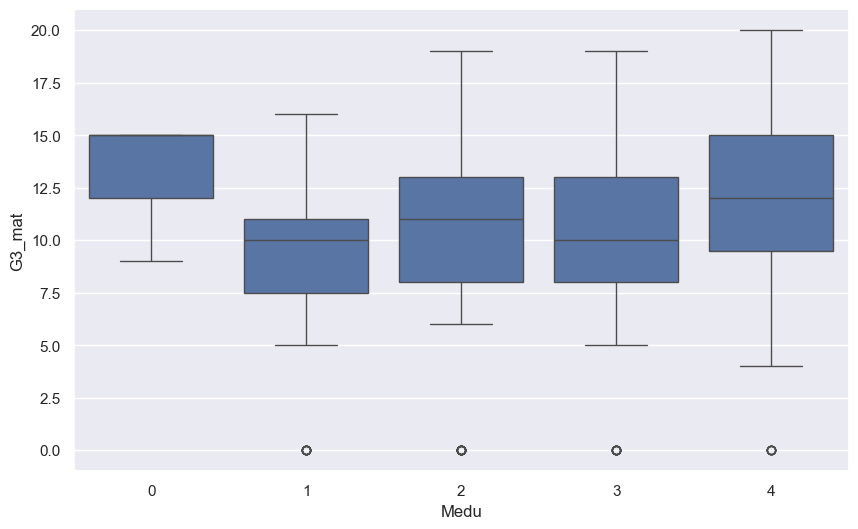

In [81]:
#gráfico de bigodes
plt.figure(figsize = (10,6))
sns.boxplot(data=students_performance_all_df, x = "Medu", y = "G3_mat")

In [82]:
print(Medu1_G3mat.mean())
print(Medu2_G3mat.mean())
print(Medu3_G3mat.mean())
print(Medu4_G3mat.mean())

8.677966101694915
9.728155339805825
10.303030303030303
11.763358778625955


In [83]:
from scipy.stats import f_oneway
stat, p = f_oneway(Medu1_G3mat, Medu2_G3mat, Medu3_G3mat, Medu4_G3mat)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=7.765, p=0.000
Probably different distributions


##### Multiple Comparisons (post-hoc tests)

The most commonly used post-hoc tests are:

- Tukey's Honestly Significant Difference (HSD): A widely used test that controls the family-wise error rate and compares all pairs of groups.
- Bonferroni correction: Adjusts the significance level to account for multiple comparisons. It is more conservative.
- Scheffé’s test: Suitable for unequal sample sizes and is very conservative.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.0502 0.4762 -0.8338 2.9342  False
     1      3   1.6251 0.1225 -0.2727 3.5229  False
     1      4   3.0854 0.0001  1.2762 4.8946   True
     2      3   0.5749 0.7978 -1.0492 2.1989  False
     2      4   2.0352 0.0034  0.5156 3.5548   True
     3      4   1.4603 0.0693 -0.0763  2.997  False
---------------------------------------------------


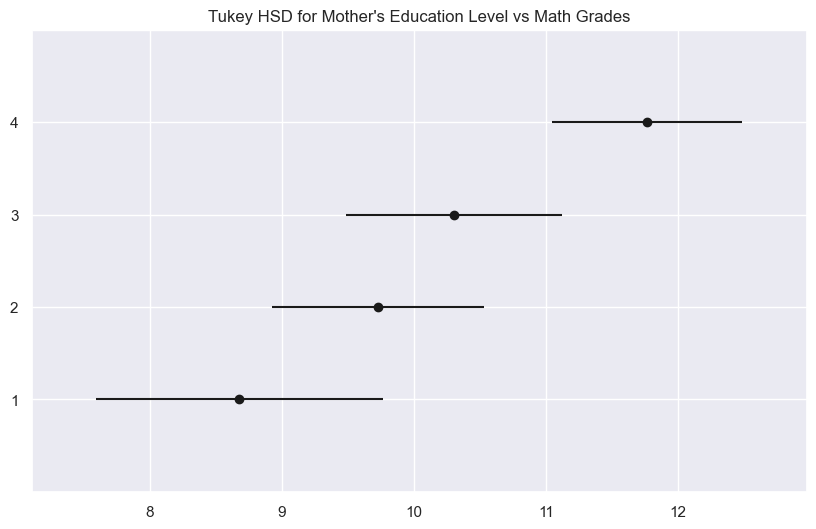

In [84]:

# Apply the Tukey HSD test
tukey = pairwise_tukeyhsd(endog=students_performance_all_df[students_performance_all_df['Medu'].isin([1, 2, 3, 4])].G3_mat, groups=students_performance_all_df[students_performance_all_df['Medu'].isin([1, 2, 3, 4])].Medu, alpha=0.05)
print(tukey)

# Step 3: Visualize the results of Tukey's test
tukey.plot_simultaneous()
plt.title('Tukey HSD for Mother\'s Education Level vs Math Grades')
plt.show()

#### NonParametric :: Kruskal–Wallis Test
to compare three or more groups when the data are not normally distributed (the test for normally distributed data is the ANOVA-test)
The test statistic for the Kruskal–Wallis test follows the chi-square distribution.



In [85]:
students_performance_all_df.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [86]:
Mjob_athome_G3mat = students_performance_all_df.loc[students_performance_all_df['Mjob']=='at_home', 'G3_mat']
Mjob_health_G3mat = students_performance_all_df.loc[students_performance_all_df['Mjob']=='health', 'G3_mat']
Mjob_services_G3mat = students_performance_all_df.loc[students_performance_all_df['Mjob']=='services', 'G3_mat']
Mjob_teacher_G3mat = students_performance_all_df.loc[students_performance_all_df['Mjob']=='teacher', 'G3_mat']
Mjob_other_G3mat = students_performance_all_df.loc[students_performance_all_df['Mjob']=='other', 'G3_mat']

<Axes: xlabel='Mjob', ylabel='G3_mat'>

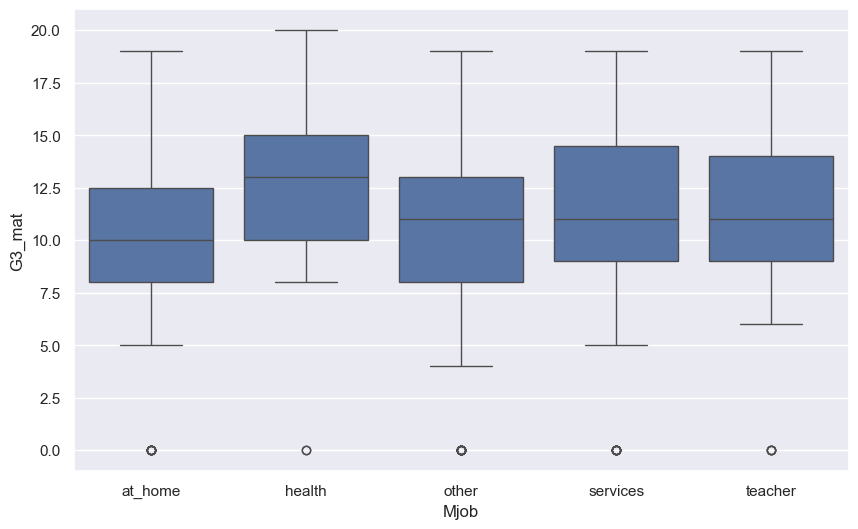

In [87]:
#gráfico de bigodes
plt.figure(figsize = (10,6))
sns.boxplot(data=students_performance_all_df, x = "Mjob", y = "G3_mat")

In [88]:
print("Median mat grade for students who is mother job is at_home: ", Mjob_athome_G3mat.median())
print("Median mat grade for students who is mother job is health: ", Mjob_health_G3mat.median())
print("Median mat grade for students who is mother job is services: ", Mjob_services_G3mat.median())
print("Median mat grade for students who is mother job is teacher: ", Mjob_teacher_G3mat.median())
print("Median mat grade for students who is mother job is other: ", Mjob_other_G3mat.median())


Median mat grade for students who is mother job is at_home:  10.0
Median mat grade for students who is mother job is health:  13.0
Median mat grade for students who is mother job is services:  11.0
Median mat grade for students who is mother job is teacher:  11.0
Median mat grade for students who is mother job is other:  11.0


In [89]:
print(Mjob_athome_G3mat.mean())
print(Mjob_health_G3mat.mean())
print(Mjob_services_G3mat.mean())
print(Mjob_teacher_G3mat.mean())
print(Mjob_other_G3mat.mean())


9.152542372881356
12.147058823529411
11.019417475728156
11.051724137931034
9.822695035460994


In [90]:
students_performance_all_df.groupby(['Mjob']).size()

Mjob
at_home      59
health       34
other       141
services    103
teacher      58
dtype: int64

In [91]:
# the kruskal-wallis test to assess the differences between groups
from scipy.stats import kruskal
stat, p = kruskal(Mjob_athome_G3mat, Mjob_health_G3mat, Mjob_services_G3mat, Mjob_teacher_G3mat, Mjob_other_G3mat)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=16.127, p=0.003


The most common post-hoc tests that can be applied after a Kruskal-Wallis test are:
- Dunn’s Test (with Bonferroni Correction): Dunn's test compares each pair of groups, adjusting the significance level to account for multiple comparisons. Bonferroni correction is often used with Dunn’s test to control the family-wise error rate (the increased likelihood of Type I errors when making multiple comparisons).
- Nemenyi Post-Hoc Test: The Nemenyi test is typically used when sample sizes are equal across groups. However, it can be less powerful than Dunn's test, so Dunn's test is preferred in many cases.
- Wilcoxon Rank-Sum Test (Mann-Whitney U Test) with Bonferroni or Holm Correction: If you want to compare specific pairs of groups after a significant Kruskal-Wallis test, you can perform multiple Wilcoxon rank-sum tests (also known as Mann-Whitney U tests). This is a pairwise comparison test similar to the independent samples t-test but for ranks. To adjust for multiple comparisons, you can apply either the Bonferroni correction or the Holm correction to the p-values.

In [92]:
if p < 0.05:
    # Dunn's test using scikit-posthocs
    posthoc = sp.posthoc_dunn(students_performance_all_df, val_col='G3_mat', group_col='Mjob', p_adjust='bonferroni')
    print(posthoc)



           at_home    health     other  services  teacher
at_home   1.000000  0.010325  1.000000  0.098080  0.41461
health    0.010325  1.000000  0.030980  1.000000  1.00000
other     1.000000  0.030980  1.000000  0.306275  1.00000
services  0.098080  1.000000  0.306275  1.000000  1.00000
teacher   0.414610  1.000000  1.000000  1.000000  1.00000


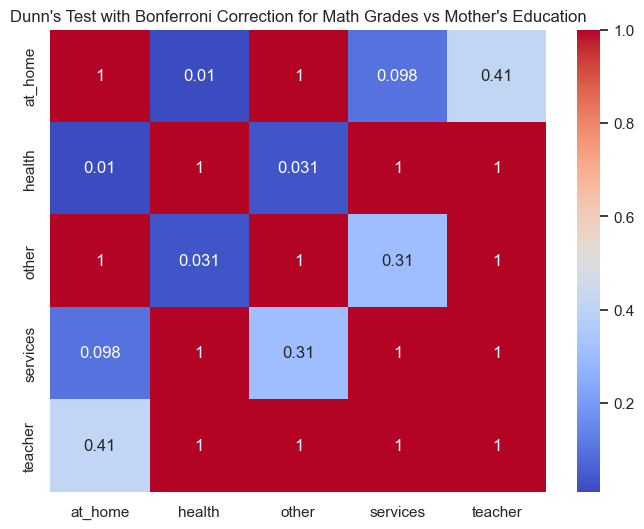

In [93]:
# Visualize the results using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(posthoc, annot=True, cmap="coolwarm", cbar=True)
plt.title('Dunn\'s Test with Bonferroni Correction for Math Grades vs Mother\'s Education')
plt.show()

**A Final Note: Why Use Bonferroni (or Other) Corrections for Multiple Comparisons?**

When performing **multiple comparisons** in hypothesis testing, we need to control for the increased risk of **Type I errors** (false positives). A **Type I error** occurs when we falsely reject the null hypothesis. Without correcting for multiple comparisons, this risk increases as the number of tests grows.

**»»» Why Multiple Comparisons Increase Type I Error Risk?**

In a single hypothesis test, we usually set a significance level (e.g., \(alpha = 0.05 \)), meaning there’s a 5% chance of making a **Type I error**.

However, when performing **multiple hypothesis tests**, the overall probability of making at least one **Type I error** across all tests increases. Each test contributes its own chance of a false positive, and this risk compounds across multiple tests.

For example:
- If you conduct **5 pairwise comparisons** with a significance level \( alpha = 0.05 \) for each test, the overall probability of making at least one Type I error becomes much higher than 5%.

Probability of at Least One Type I Error

For each individual test, the probability of **not** making a Type I error is:

\[
$ 1 - alpha $
\]

For \( k \) independent tests, the probability of not making a Type I error across all tests is:

\[
$ (1 - alpha)^k $
\]

Thus, the probability of making **at least one Type I error** across the \( k \) tests is:

\[
$ 1 - (1 - alpha)^k $
\]

As \( k \) increases, the probability of making at least one Type I error increases.



If you apply pairwise tests (such as t-tests or Mann-Whitney U tests) directly for each comparison **without any correction**, the cumulative Type I error rate will increase. This leads to an inflated risk of false positives.

For example:

- If you compare **4 groups** using pairwise tests, you will have to perform **6 comparisons** (since \( $ \binom{4}{2} = 6 $ \) ways to choose 2 groups out of 4).
- Each test with \( $ \alpha = 0.05 \ $ ) results in a much higher overall risk of false positives when considering all tests.

»»» **How the **Bonferroni Correction** Works?**

The **Bonferroni correction** controls the family-wise error rate (FWER) by adjusting the significance level \( $ \alpha $ \). It does so by dividing \( $ \alpha \ $) by the number of comparisons \( $ k $ \):

\[ 
  $ \alpha_{ \text{adjusted}} = \frac{\alpha}{k} $
\]

This ensures that the cumulative probability of making at least one Type I error across all tests remains below the desired significance level \( $ \alpha \ $).

For example:

If \( $ \alpha = 0.05 \ $) and you conduct **6 pairwise comparisons**, the **Bonferroni-adjusted** significance level is:

  \[
  $ \alpha_{\text{adjusted}} = \frac{0.05}{6} \approx 0.0083 $
  \]

Now, each individual test must have a **p-value less than 0.0083** to be considered statistically significant.


**Another example...**

Suppose you are analyzing differences in students' math scores across **5 education levels**. If you perform pairwise comparisons without adjusting for multiple comparisons, you would conduct 
\( $ \binom{5}{2} = 10 $ \) pairwise tests.

- If you set \( $ \alpha = 0.05 $ \) for each test, the probability of making at least one Type I error across the 10 tests is:
  
  \[
  $ 1 - (1 - 0.05)^{10} \approx 0.401 $
  \]

  This means there is a **40.1% chance** of making at least one false positive, much higher than the desired 5%.


### Categorical Data

#### The Chi-Square 


**The Chi-Square Distribution**

The chi-square distribution is a continuous probability distribution used primarily in statistical inference, especially in tests of independence, goodness of fit, and variance. It is particularly useful when dealing with categorical data.

»» Key Characteristics of the Chi-Square Distribution:

- **Non-negative values**: The chi-square distribution is defined only for values greater than or equal to zero.
- **Right-skewed**: For small degrees of freedom (df), the distribution is heavily skewed to the right. As the degrees of freedom increase, the distribution becomes more symmetric and bell-shaped.
- **Degrees of Freedom (df)**: The shape of the chi-square distribution depends on the degrees of freedom. As df increases, the chi-square distribution approaches a normal distribution.
- **Additive Property**: The sum of independent chi-square distributed variables is also chi-square distributed. The total degrees of freedom of the sum are the sum of the individual degrees of freedom.

»» Formula:

The chi-square statistic is calculated as:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

Where:

- $ O_i $ is the observed frequency in category $ i $,
- $ E_i $ is the expected frequency under the null hypothesis in category $ i $,
- The summation is over all categories.

**Applications of the Chi-Square Distribution in Statistical Inference**

1. Chi-Square Test for Independence

The chi-square test for independence tests whether two categorical variables are independent of each other. It is commonly applied to contingency tables.

    *Example*: In the student performance data, you could test whether the parental education level is associated with student course failure.
    Hypotheses:
    - Null Hypothesis (H₀): There is no association (the variables are independent).
    - Alternative Hypothesis (H₁): There is an association (the variables are dependent).

2. Chi-Square Test for Homogeneity

The chi-square test for homogeneity checks whether the distribution of a categorical variable is the same across different populations or groups.

    *Example*: You could test if the distribution of students’ extracurricular activities is the same across different school types (public vs. private).
    Hypotheses:
    - Null Hypothesis (H₀): The distribution of the categorical variable is the same across groups.
    - Alternative Hypothesis (H₁): The distribution differs across groups.

3. Chi-Square Test for Goodness of Fit
The goodness of fit test is used to determine how well an observed distribution matches an expected distribution. It answers the question: "Do the observed frequencies significantly differ from the expected frequencies?"

    *Example*: You expect students' travel times to school to follow a certain distribution (e.g., uniform), and you want to test if the observed data fits this distribution.
    Hypotheses:
    - Null Hypothesis (H₀):The observed frequencies match the expected frequencies (no significant difference).
    - Alternative Hypothesis (H₁): The observed frequencies differ significantly from the expected frequencies.



**Steps in a Chi-Square Test and Using the Chi-Square Distribution**

1. **Set Up Hypotheses** (for an idenpendence test):
    - **Null Hypothesis (H₀)**: The two variables are independent
    - **Alternative Hypothesis (H₁)**: The two variables are dependent

2. **Create a Contingency Table** (for an independence test):
    - Summarize the observed frequencies for the two categorical variables.

3. **Compute the Expected Frequencies** (for an independence test):
    - Calculate the expected frequencies based on the assumption of independence or based on a theoretical distribution:

  $$ E_i = \frac{(\text{row total}) \times (\text{column total})}{\text{grand total}} $$


4. **Calculate the Chi-Square Statistic** (for an independence test):
    - Use the formula:

    $$  chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$ 

    The larger the difference between the observed and expected frequencies, the larger the chi-square statistic will be.

5. **Determine the Degrees of Freedom** (for an independence test):
    - For a contingency table:
    
    $$  \text{df} = (r - 1)(c - 1) $$ 
    
    where \( r \) is the number of rows and \( c \) is the number of columns.

    - For goodness-of-fit tests:
    
    $$ \text{df} = k - 1$$ 
    
    where \( k \) is the number of categories.

6. **Find the Critical Value or P-Value** (for an independence test):
    - Compare the calculated chi-square statistic to the critical value from the chi-square distribution table at the appropriate degrees of freedom and significance level (e.g., \(alpha = 0.05 \)).
    - Alternatively, calculate the p-value using the chi-square distribution and compare it to the significance level \( \alpha \).

7. **Make a Decision** (for an independence test):
    - If the chi-square statistic exceeds the critical value, or if the p-value is less than \(alpha\), reject the null hypothesis.
    - Otherwise, fail to reject the null hypothesis.



**Example: Chi-Square Test for Independence**
Let’s say you want to test whether **parental education level** (which is a categorical variable in the dataset) has an impact on whether a student **fails the course** or not. This involves checking whether the distribution of course failures is independent of parental education level.

*Hypotheses for the Test:*

- **Null Hypothesis (H₀)**: There is no association between parental education level and student course failure. The variables are independent.
- **Alternative Hypothesis (H₁)**: There is an association between parental education level and student course failure. The variables are dependent.

»» Steps to Perform the Chi-Square Test:
1. **Create a Contingency Table**:
    - A contingency table is a matrix that shows the frequency of occurrences for combinations of the two categorical variables. For example:
        - **Rows**: Parental education level (e.g., primary, secondary, higher education)
        - **Columns**: Whether a student failed the course (yes/no)
2. **Calculate the Chi-Square Test Statistic**:
    - The chi-square test compares the observed frequencies in the contingency table with the expected frequencies under the assumption that the variables are independent.
    - The formula for the chi-square statistic is:

    $$ chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$ 

    where \( O_i \) is the observed frequency, and \( E_i \) is the expected frequency in cell \( i \).
3. **Degrees of Freedom**:
    - The degrees of freedom for the chi-square test are calculated as:

    $$ \text{df} = (r - 1)(c - 1)$$ 

    where \( r \) is the number of rows (categories of the first variable) and \( c \) is the number of columns (categories of the second variable).
4. **Compare the Chi-Square Statistic**:
    - Compare the computed chi-square statistic with the critical value from the chi-square distribution for the given degrees of freedom and significance level (typically 0.05).
    - Alternatively, calculate the p-value and compare it to the significance level.


In [94]:
students_performance_all_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime_mat',
       'failures_mat', 'schoolsup_mat', 'famsup_mat', 'paid_mat',
       'activities_mat', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'student_id', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por', 'travel_time_cont',
       'FinalResult_por', 'FinalResult_mat', 'FinalResult_overall'],
      dtype='object')

In [95]:
students_performance_all_df.FinalResult_mat.unique()

array(['Fail', 'Pass'], dtype=object)

In [96]:
#count the values in each class of the variable (big classes and small classes and (number os students aproved and not aproved)
school_vector = students_performance_all_df['school'].value_counts().values.tolist()
aproved = students_performance_all_df['FinalResult_mat'].value_counts().values.tolist()

In [97]:
#define the two groups
school=students_performance_all_df.school
aproved=students_performance_all_df.FinalResult_mat

In [98]:
#show the crosstab
myTable=pd.crosstab(school, aproved)
myTable

FinalResult_mat,Fail,Pass
school,,
GP,113,236
MS,17,29


In [99]:
#show the chi square test and the expected values
Chi2ContingencyResult = stats.chi2_contingency(myTable)
stats.chi2_contingency(myTable)

Chi2ContingencyResult(statistic=np.float64(0.20633910759821295), pvalue=np.float64(0.6496520320478856), dof=1, expected_freq=array([[114.86075949, 234.13924051],
       [ 15.13924051,  30.86075949]]))

In [100]:
Chi2ContingencyResult[3]

array([[114.86075949, 234.13924051],
       [ 15.13924051,  30.86075949]])

In [101]:
print("Chi2 statistic: ", Chi2ContingencyResult[0])
print("p-value: ", Chi2ContingencyResult[1])

Chi2 statistic:  0.20633910759821295
p-value:  0.6496520320478856


As p-value > alfa (e.g.: 0.05), we do not reject the null hypothesis and conclude that there is no association between school and the student's failure.

## **PART 10 - Correlation and introduction to regression**

What is Correlation?

Correlation is a statistical measure that expresses the extent to which two variables are linearly related. It provides a quantitative value that shows the degree and direction of association between the variables.

»» **Key Concepts**:
- **Positive Correlation**: When one variable increases, the other variable tends to increase as well.
- **Negative Correlation**: When one variable increases, the other variable tends to decrease.
- **No Correlation**: There is no recognizable pattern in the relationship between two variables.


### Pearson correlation

**Pearson Correlation Coefficient (r)**: Measures the strength and direction of the linear relationship between two continuous variables. It assumes that the variables are normally distributed and have a linear relationship.
    
- Range: -1 to +1.
- Use case: Suitable for variables with a linear relationship and normally distributed data.

The Pearson correlation coefficient is calculated using the formula:

$$ r = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum (x_i - \overline{x})^2 \sum (y_i - \overline{y})^2}} $$


- **r = 1**: Perfect positive linear relationship.
- **r = -1**: Perfect negative linear relationship.
- **r = 0**: No linear relationship.



In [102]:
students_performance_all_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime_mat',
       'failures_mat', 'schoolsup_mat', 'famsup_mat', 'paid_mat',
       'activities_mat', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'student_id', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por', 'travel_time_cont',
       'FinalResult_por', 'FinalResult_mat', 'FinalResult_overall'],
      dtype='object')

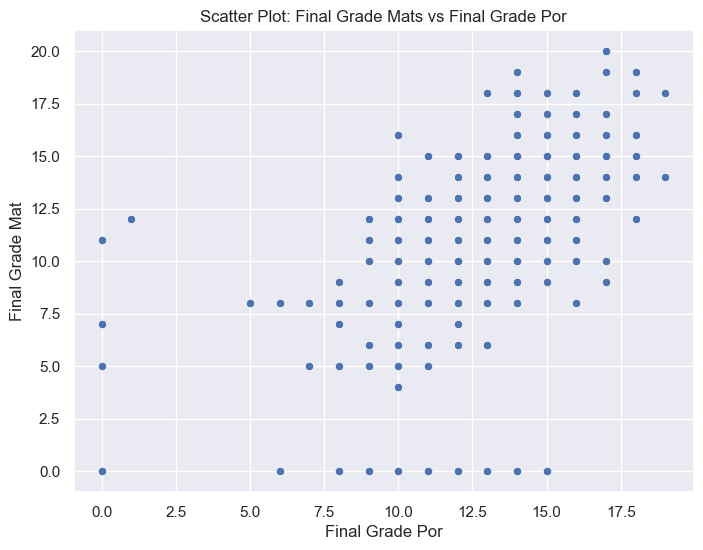

In [103]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='G3_por', y='G3_mat', data=students_performance_all_df)
plt.title('Scatter Plot: Final Grade Mats vs Final Grade Por')
plt.xlabel('Final Grade Por')
plt.ylabel('Final Grade Mat')
plt.show()

The Pearson correlation gives an idea of how well the linear model (relationship) fits to describe the relation between the final grade of mat and por.

In [104]:
students_performance_all_df_nonull = students_performance_all_df.dropna(subset=['G3_por', 'G3_mat'])

In [105]:
from scipy.stats import pearsonr
stats.pearsonr(students_performance_all_df_nonull['G3_por'], students_performance_all_df_nonull['G3_mat'])

PearsonRResult(statistic=np.float64(0.49313428157352335), pvalue=np.float64(4.535914925565227e-24))

<Axes: >

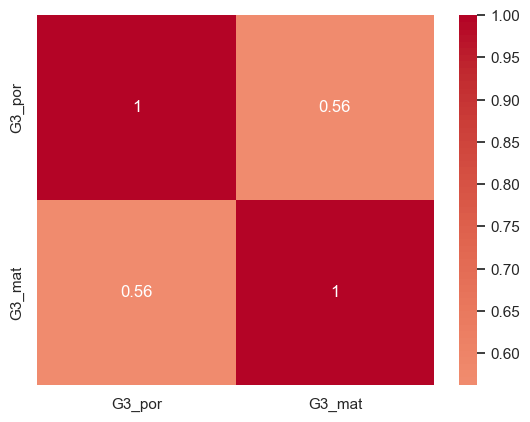

In [106]:
sns.heatmap(students_performance_all_df_nonull[['G3_por', 'G3_mat']].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)


### Spearman correlation

Spearman's Rank Correlation Coefficient

Spearman's correlation is calculated by ranking the variables and applying Pearson’s correlation formula to the ranks:

$$  \rho = 1 - \frac{6 \sum d_i^2}{n(n^2-1)} $$ 

Where $d_i$ is the difference between the ranks of corresponding variables and \(n\) is the sample size.


Spearman coefficient

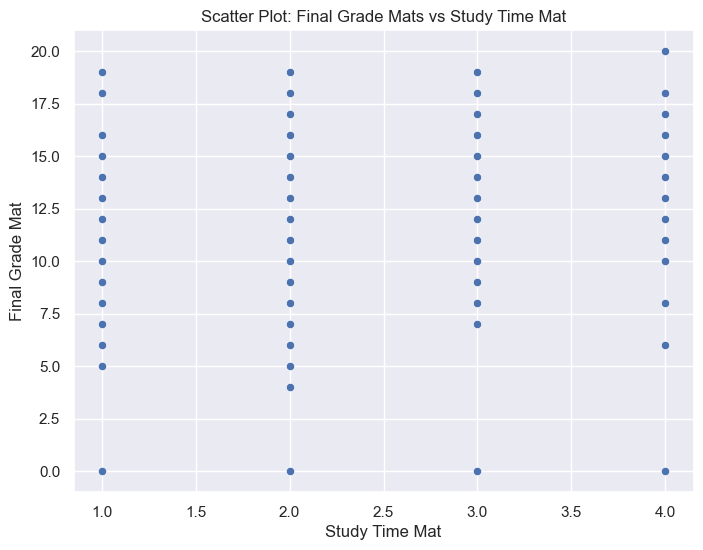

In [107]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='studytime_mat', y='G3_mat', data=students_performance_all_df)
plt.title('Scatter Plot: Final Grade Mats vs Study Time Mat')
plt.xlabel('Study Time Mat')
plt.ylabel('Final Grade Mat')
plt.show()

In [108]:
from scipy.stats import spearmanr
stats.spearmanr(students_performance_all_df_nonull['studytime_mat'], students_performance_all_df_nonull['G3_mat'])

SignificanceResult(statistic=np.float64(0.07897857571664993), pvalue=np.float64(0.12941510165049477))

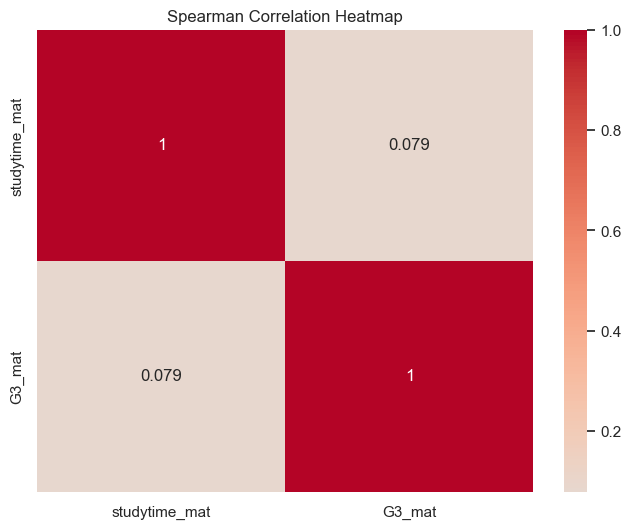

In [109]:
# Heatmap for Spearman correlation
plt.figure(figsize=(8,6))
sns.heatmap(students_performance_all_df_nonull[['studytime_mat', 'G3_mat']].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.show()

### **(Simple) Regression**


Linear regression is one of the most fundamental algorithms in statistics and machine learning. It models the relationship between a **dependent variable** (also known as the response or output) and one or more **independent variables** (also known as predictors or features).

In its simplest form, **simple linear regression** involves one independent variable and one dependent variable. The goal is to find the best-fitting line that explains the relationship between these variables.

**The Linear Regression Model**:

The equation of a simple linear regression model is:
\[
y = \beta_0 + \beta_1 x + \epsilon
\]
Where:
- \( y \) is the dependent variable,
- \( x \) is the independent variable,
- \( $ \beta_0 $ \) is the intercept (the value of \( y \) when \( x = 0 \)),
- \( $ \beta_1 $ \) is the slope (the amount of change in \( y \) for each unit increase in \( x \)),
- \( $ \epsilon $ \) is the error term (the difference between the observed and predicted values).


**The "BLUE" Assumptions in Linear Regression**

In linear regression, the **Ordinary Least Squares (OLS)** estimator is considered **BLUE** — that is, the **Best Linear Unbiased Estimator** — when it satisfies certain assumptions. These assumptions ensure that the model provides reliable and interpretable results.


- **Best**: The estimator has the smallest possible variance among all unbiased linear estimators (it is efficient).
- **Linear**: The estimator is a linear function of the observed data.
- **Unbiased**: On average, the estimator hits the true value of the parameter being estimated (no systematic error).
- **Estimator**: A rule or method used to estimate the coefficients of the linear regression model.

For OLS to be BLUE, it must satisfy the **Gauss-Markov Theorem**, which is based on the following assumptions:

1. **Linearity of the Model**

The relationship between the dependent variable \( y \) and the independent variables \( X \) must be **linear in parameters**.

$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon $

- **Interpretation**: The model assumes that the dependent variable is a linear function of the independent variables and an error term. The relationship between the independent and dependent variables does not have to be perfectly linear, but the parameters (coefficients) must enter the model linearly.
- **Implication**: If this assumption is violated, the OLS estimates may not capture the true relationship, leading to biased results.



2. **Independence of Errors (No Autocorrelation)**

The error terms \( $ \epsilon $ \) must be independent of one another.

- **Interpretation**: The residuals (errors) for different observations should not be correlated. This is especially important in time series data where autocorrelation is common.

- **Implication**: If the errors are correlated (autocorrelated), OLS estimates remain unbiased, but they are no longer efficient. The variance of the estimates is higher, and hypothesis tests (t-tests, F-tests) may be invalid.

- **Test**: The Durbin-Watson test is commonly used to check for autocorrelation.



3. **Homoscedasticity (Constant Variance of Errors)**

The variance of the error terms should be constant across all levels of the independent variable.

\[
$ \text{Var}(\epsilon_i) = \sigma^2 \quad \forall i $
\]

- **Interpretation**: The spread of the residuals should be roughly the same for all predicted values. If the errors show a pattern (e.g., increasing or decreasing variance), we have **heteroscedasticity**.

- **Implication**: If heteroscedasticity is present, OLS estimates are still unbiased, but standard errors could be incorrect, leading to unreliable hypothesis tests (confidence intervals and p-values).

- **Test**: The Breusch-Pagan or White test can detect heteroscedasticity.



4. **No Perfect Multicollinearity**

The independent variables should not be perfectly correlated with each other.

- **Interpretation**: Multicollinearity means that one independent variable can be expressed as a perfect linear function of another (or a combination of others). This causes problems in estimating regression coefficients, as OLS cannot determine the unique contribution of each variable.

- **Implication**: Perfect multicollinearity makes it impossible to estimate the OLS coefficients, while high but imperfect multicollinearity can make estimates unstable with large standard errors.

- **Test**: The Variance Inflation Factor (VIF) is commonly used to detect multicollinearity. A VIF above 10 suggests significant multicollinearity.



5. **Exogeneity (No Correlation Between Errors and Independent Variables)**

The error term \( $ \epsilon $ \) should have a mean of zero and must not be correlated with any of the independent variables \( $ X $ \).

\[
$ E(\epsilon | X) = 0 $
\]

- **Interpretation**: The independent variables should not contain information about the errors. In other words, the error term should not systematically miss important predictors of \( y \) that are included in \( X \).

- **Implication**: If this assumption is violated (i.e., if there is **endogeneity**), the OLS estimates will be biased. This often happens due to omitted variables or reverse causality.

- **Test**: The Hausman test can be used to check for endogeneity.

---

»»» **What Happens if BLUE Assumptions Are Violated?**

- **Linearity**: Violating this assumption leads to biased estimates, as the model fails to capture the true relationship between \( $ y  $ \) and \($ X $\).
- **Independence of Errors**: Autocorrelation leads to inefficiency of the OLS estimates, and hypothesis tests become invalid.
- **Homoscedasticity**: Heteroscedasticity causes the OLS estimates to remain unbiased, but standard errors and confidence intervals will be incorrect.
- **Multicollinearity**: Multicollinearity inflates the variance of the estimates, leading to less precise estimates.
- **Exogeneity**: When errors are correlated with the independent variables, OLS estimates will be biased, and conclusions drawn from the model may be incorrect.

---

»» **Is Normality Distribution for the variables Required in Linear Regression?**

**Normality of the independent variables** is **not required** for OLS to be BLUE. 

OLS makes no assumptions about the distribution of the independent variables \( $ X $ \). However, **normality of residuals** (errors) is important for other aspects:

**Why is Normality Useful?**

- **For Valid Hypothesis Testing**: 
  - If the residuals are normally distributed, the **t-tests** for individual coefficients and the **F-test** for the overall model are valid.
  - In small sample sizes, normality is more critical. With larger samples, the **Central Limit Theorem** often ensures that the sampling distribution of the coefficients will be approximately normal, even if the residuals are not.

- **For Confidence Intervals**: 
  - Normality ensures that confidence intervals for the coefficients are accurate and reliable.

»»» **Implication:**

- **Residuals Normality**: OLS does not require the residuals to be normally distributed for the estimates to be unbiased. However, normality is important for making inferences from the model (e.g., calculating p-values, confidence intervals).
- **Non-Normal Residuals**: If the residuals are not normal, the OLS estimates are still unbiased and consistent, but statistical tests may become unreliable, especially in small samples.



In [110]:
students_performance_all_df_nonull.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime_mat',
       'failures_mat', 'schoolsup_mat', 'famsup_mat', 'paid_mat',
       'activities_mat', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'student_id', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por', 'travel_time_cont',
       'FinalResult_por', 'FinalResult_mat', 'FinalResult_overall'],
      dtype='object')

<Axes: xlabel='G1_mat', ylabel='Count'>

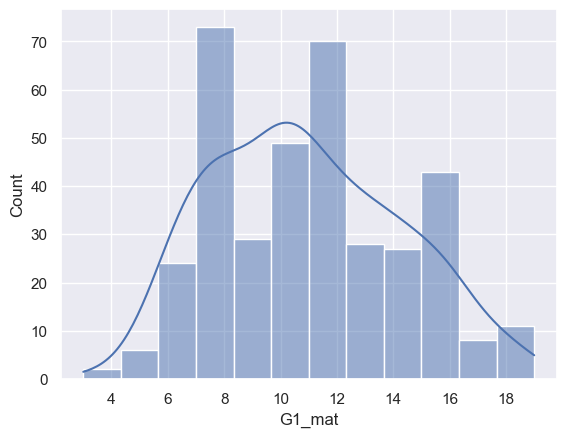

In [123]:
sns.histplot(students_performance_all_df_nonull["G1_mat"], kde=True)

<Axes: xlabel='G3_mat', ylabel='Count'>

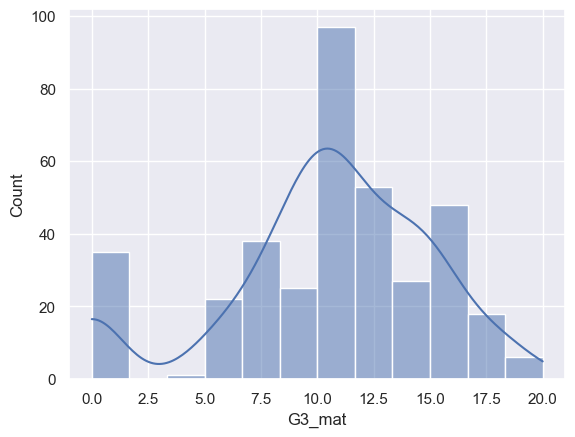

In [124]:
sns.histplot(students_performance_all_df_nonull["G3_mat"], kde=True)

<Axes: xlabel='G1_mat', ylabel='G3_mat'>

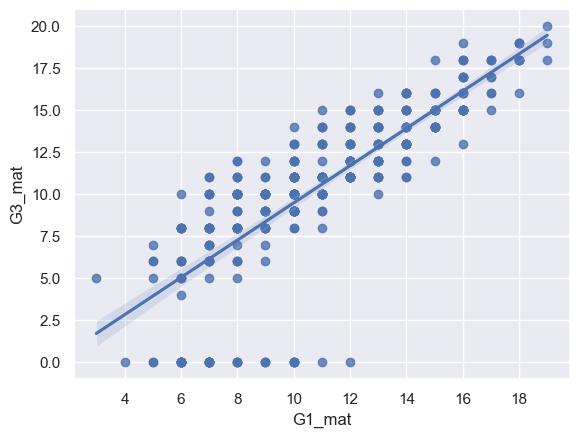

In [125]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(students_performance_all_df_nonull, x='G1_mat', y='G3_mat', ci=95)

In [147]:
from scipy.stats import pearsonr
stats.pearsonr(students_performance_all_df_nonull['G1_mat'], students_performance_all_df_nonull['G3_mat'])

PearsonRResult(statistic=np.float64(0.8051189632104108), pvalue=np.float64(1.6861717819939172e-85))

In [126]:
x = students_performance_all_df_nonull['G1_mat']
y = students_performance_all_df_nonull['G3_mat']

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [141]:
X = students_performance_all_df_nonull[['G1_mat']]
y = students_performance_all_df_nonull[['G3_mat']]

In [142]:
# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y )

# Print the intercept and coefficient
print(f'Intercept: {lin_reg.intercept_}')
print(f'Coefficient: {lin_reg.coef_[0]}')

Intercept: [-1.61631173]
Coefficient: [1.10918991]


In [143]:
# Make predictions on the test set
y_pred = lin_reg.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 7.45
R-squared: 0.65


In [144]:
# Add a constant to the test set
Xsm = sm.add_constant(X)


sm_model = sm.OLS(y, Xsm).fit() 

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 G3_mat   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     678.1
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.69e-85
Time:                        16:31:04   Log-Likelihood:                -896.58
No. Observations:                 370   AIC:                             1797.
Df Residuals:                     368   BIC:                             1805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6163      0.485     -3.331      0.001      -2.571      -0.662
G1_mat         1.1092      0.043     26.040      0.000       1.025       1.193
==============================================================================
Omnibus:                      114.899   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.461
Skew:                          -1.507   Prob(JB):                     1.89e-64
Kurtosis:                       6.155   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:

# Make predictions using the statsmodels model
y_pred_sm = sm_model.predict(Xsm)

# Evaluate the model
mse_sm = mean_squared_error(y, y_pred_sm)
r2_sm = r2_score(y, y_pred_sm)

print(f'Mean Squared Error: {mse_sm:.2f}')
print(f'R-squared: {r2_sm:.2f}')

Mean Squared Error: 7.45
R-squared: 0.65
